# GC content distribution in seqwalk libraries

Running all cells of `library_generation.ipynb` will generate files with sequences that can be analyzed by running this notebook. No adjustments of filenames are necessary. 

In [1]:
import nupack as nu
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def gc(seq):
    return sum( 1 for s in seq if s in ["G", "C"])/len(seq)

In [3]:
d = {
    "Alphabet" : [],
    "k" : [],
    "L" : [],
    "GC content" : []
}

for SSM_k in [6, 8, 10]:
    for L in [10, 15, 20]:
        for a in [3, 4]:
            filename = "SSM_%d-L_%d-a_%d" % (SSM_k, L, a)
            f = open(filename, "r")
            seqs = [s.strip() for s in f.readlines()]
            f.close
            for seq in seqs:
                d["Alphabet"].append(a)
                d["k"].append(SSM_k)
                d["L"].append(L)
                d["GC content"].append(gc(seq))

data = pd.DataFrame(d)

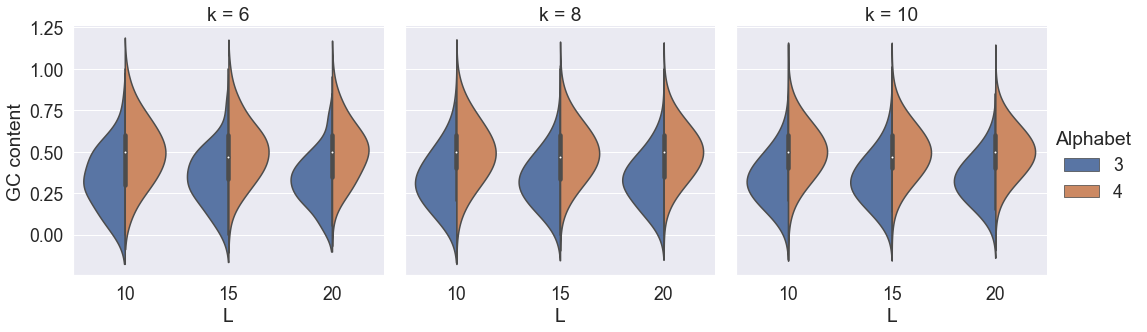

In [4]:
sns.set(font_scale=1.6)
# g = sns.FacetGrid(data, row="k", col="L", hue="Alphabet")
g = sns.catplot(data = data, y = "GC content", x="L", col="k", hue="Alphabet", 
                split=True, kind="violin", bw=0.5)
g.figure.savefig("GC.png", dpi=600)

In [5]:
var = data.groupby("Alphabet").var(ddof=1)["GC content"]

print("Variance of 3 letter: %f" % var[3])
print("Variance of 4 letter: %f" % var[4])

Variance of 3 letter: 0.022279
Variance of 4 letter: 0.024824


In [6]:
g.figure.savefig("GC.png", dpi=600)